# This program attempts to predict the mutation score 

In [98]:
from sklearn import datasets
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

## Read and Process Dataframe

Combining data from the following analysis: 
* lazytracker.json
* 101_intersection.json
* 101_palindrome.json
* 101_sorting.json

Drop NA values
Drop "test_" functions

In [99]:
def process_json_file(filepath):
    sub_df = pd.read_json(filepath)
    sub_df = sub_df.dropna()
    sub_df = sub_df[~sub_df['function_name'].str.startswith("test_")]
    return sub_df

In [100]:
dataframes = []
folder_path = "../json_analysis"

for filename in os.listdir(folder_path):
    if filename.endswith("json"):
        print(filename)
        filepath = os.path.join(folder_path, filename)
        sub_df = process_json_file(filepath)
        sub_df.insert(0,"filename",filename)
        dataframes.append(sub_df)

df = pd.concat(dataframes, ignore_index=True)

diagrams_output.json
pythonPoetry_output.json
pudb_output.json
poetryize_output.json
playground_output.json
code_output.json
dummy_project.json
pyCicd_output.json


In [101]:
df

,filename,function_name,function_scope,patterns,mutants,mutation_score
0,diagrams_output.json,pre_mutation,3-11,"[{'lineno': 6, 'coloffset': 4, 'linematch': 'i...","[{'name': 'Mutant #367', 'line': 9, 'descripti...",0.000000
1,diagrams_output.json,render,193-198,"[{'lineno': 194, 'coloffset': 8, 'linematch': ...","[{'name': 'Mutant #107', 'line': 196, 'descrip...",0.000000
2,diagrams_output.json,__init__,446-487,"[{'lineno': 466, 'coloffset': 8, 'linematch': ...","[{'name': 'Mutant #224', 'line': 449, 'descrip...",11.764706
3,diagrams_output.json,append,515-525,"[{'lineno': 518, 'coloffset': 12, 'linematch':...","[{'name': 'Mutant #247', 'line': 516, 'descrip...",25.000000
4,diagrams_output.json,connect,527-540,"[{'lineno': 528, 'coloffset': 8, 'linematch': ...","[{'name': 'Mutant #251', 'line': 533, 'descrip...",100.000000
...,...,...,...,...,...,...
250,dummy_project.json,setSSN,306-308,"[{'lineno': 306, 'coloffset': 4, 'linematch': ...","[{'name': 'Mutant #175', 'line': 307, 'descrip...",100.000000
251,dummy_project.json,setEmail,309-311,"[{'lineno': 309, 'coloffset': 4, 'linematch': ...","[{'name': 'Mutant #176', 'line': 310, 'descrip...",100.000000
252,dummy_project.json,setAddress,312-314,"[{'lineno': 312, 'coloffset': 4, 'linematch': ...","[{'name': 'Mutant #177', 'line': 313, 'descrip...",100.000000
253,dummy_project.json,create_person,315-318,"[{'lineno': 315, 'coloffset': 4, 'linematch': ...","[{'name': 'Mutant #178', 'line': 316, 'descrip...",100.000000


**Dropping all mutation_score with 'NA' values**

### Parsing data: check_ids and patterns

In [102]:
def extract_pattern_id(df):
    df['check_ids'] = df['patterns'].apply(lambda x: [pattern['check_id'] for pattern in x if 'check_id' in pattern])
    df['check_ids'] = df['check_ids'].apply(pd.unique)
    df['unique_patterns'] = df['patterns'].apply(lambda x: [pattern['pattern'] for pattern in x])
    df['unique_patterns'] = df['unique_patterns'].apply(pd.unique)
    return df

In [103]:
df = extract_pattern_id(df.copy())

In [104]:
df

,filename,function_name,function_scope,patterns,mutants,mutation_score,check_ids,unique_patterns
0,diagrams_output.json,pre_mutation,3-11,"[{'lineno': 6, 'coloffset': 4, 'linematch': 'i...","[{'name': 'Mutant #367', 'line': 9, 'descripti...",0.000000,"[CL001, ANNOT001, FLV001, CML001]","[.//FunctionDef/body//If, .//FunctionDef[not(a..."
1,diagrams_output.json,render,193-198,"[{'lineno': 194, 'coloffset': 8, 'linematch': ...","[{'name': 'Mutant #107', 'line': 196, 'descrip...",0.000000,"[CL001, ANNOT001, C002, CML001]","[.//FunctionDef/body//If, .//FunctionDef[not(a..."
2,diagrams_output.json,__init__,446-487,"[{'lineno': 466, 'coloffset': 8, 'linematch': ...","[{'name': 'Mutant #224', 'line': 449, 'descrip...",11.764706,"[CL001, ANNOT001, F002, C002, CML001, F030, P005]","[.//FunctionDef/body//If, .//FunctionDef[not(a..."
3,diagrams_output.json,append,515-525,"[{'lineno': 518, 'coloffset': 12, 'linematch':...","[{'name': 'Mutant #247', 'line': 516, 'descrip...",25.000000,"[CL001, ANNOT001, C002, CML001]","[.//FunctionDef/body//If, .//FunctionDef[not(a..."
4,diagrams_output.json,connect,527-540,"[{'lineno': 528, 'coloffset': 8, 'linematch': ...","[{'name': 'Mutant #251', 'line': 533, 'descrip...",100.000000,"[CL001, ANNOT001, C002, CML001, MRET001, F030,...","[.//FunctionDef/body//If, .//FunctionDef[not(a..."
...,...,...,...,...,...,...,...,...
250,dummy_project.json,setSSN,306-308,"[{'lineno': 306, 'coloffset': 4, 'linematch': ...","[{'name': 'Mutant #175', 'line': 307, 'descrip...",100.000000,"[ANNOT001, C002, CML001]",[.//FunctionDef[not(args/arg/annotation) or no...
251,dummy_project.json,setEmail,309-311,"[{'lineno': 309, 'coloffset': 4, 'linematch': ...","[{'name': 'Mutant #176', 'line': 310, 'descrip...",100.000000,"[ANNOT001, C002, CML001]",[.//FunctionDef[not(args/arg/annotation) or no...
252,dummy_project.json,setAddress,312-314,"[{'lineno': 312, 'coloffset': 4, 'linematch': ...","[{'name': 'Mutant #177', 'line': 313, 'descrip...",100.000000,"[ANNOT001, C002, CML001]",[.//FunctionDef[not(args/arg/annotation) or no...
253,dummy_project.json,create_person,315-318,"[{'lineno': 315, 'coloffset': 4, 'linematch': ...","[{'name': 'Mutant #178', 'line': 316, 'descrip...",100.000000,"[ANNOT001, C002, CML001]",[.//FunctionDef[not(args/arg/annotation) or no...


### Collect all patterns from the config files

In [105]:
import os
import ruamel.yaml

In [106]:

def get_patterns_from_yaml(filepath, key):
  """
  Extracts patterns from the 'pattern' key under the 'checks' key in a YAML file.

  Args:
      filepath: Path to the YAML file.

  Returns:
      A list of patterns found in the YAML file, or None if parsing fails.
  """
  try:
    with open(filepath) as f:
      yaml = ruamel.yaml.YAML(typ='safe', pure=True)  # Use new API for safe loading
      data = yaml.load(f)
      checks = data.get("checks")  # Get the 'checks' dictionary
      if checks:
        patterns = [check.get(key) for check in checks]  # Extract patterns from checks
        return patterns if any(patterns) else None  # Return only if patterns exist
      else:
        print(f"Warning: 'checks' key not found in YAML file: {filepath}")
        return None
  except ruamel.yaml.YAMLError as e:
    print(f"Error parsing YAML file '{filepath}': {e}")
    return None

In [107]:
def collect_config_patterns(config_dir):
  """
  Collects unique patterns from all YAML files in a directory.

  Args:
      config_dir: The directory containing the YAML files.

  Returns:
      A list of unique patterns found in the YAML files.
  """
  all_patterns = []

  # Check if config directory exists
  if not os.path.isdir(config_dir):
    raise ValueError(f"Directory '{config_dir}' does not exist.")
  for filename in os.listdir(config_dir):
    if filename.endswith(".yml"):
      filepath = os.path.join(config_dir, filename)
      patterns = get_patterns_from_yaml(filepath)
      if patterns:
        all_patterns.extend(patterns) #Extend list with patterns from each file
  #Remove duplicates using set
  config_patterns = list(set(all_patterns))

  return config_patterns

In [108]:
config_file = "../Config/AllChecks.yml"  # Replace with your actual directory path
config_patterns = get_patterns_from_yaml(config_file, "pattern")
config_names = get_patterns_from_yaml(config_file, "name")

if config_patterns:
    #print("Unique patterns found:",config_patterns, len(config_patterns))
    #print("Unique names found:",config_names, len(config_names))
    pass
else:
  print("No patterns found in the YAML files.")

pattern_dict = dict(zip(config_names, config_patterns))
print(pattern_dict)

{'single-nested-if': './/FunctionDef/body//If', 'double-nested-if': './/FunctionDef/body//If[ancestor::If and not(parent::orelse)]', 'explicit-return-in-init': './/FunctionDef[@name="__init__"]/body/Return', 'none-comparison': './/FunctionDef//Compare/left[@id="input_dirs"]/following-sibling::Compare/ops/NotEq | .//FunctionDef//Compare/comparators[@id="input_dirs"]/following-sibling::Compare/ops/NotEq', 'no-exception-type': './/FunctionDef//Try/ExceptHandler[not(ExceptHandler/type)]', 'boolean-comparison': './/FunctionDef//Compare/ops/Is | .//FunctionDef//Compare/ops/Eq', 'missing-annotations': './/FunctionDef[not(args/arg/annotation) or not(returns)]', 'key-function': './/FunctionDef//Call/func/Attribute[@attr="keys"]', 'multi-value-key-literal': './/FunctionDef/body/Assign/value/Dict/keys/Name[preceding-sibling::Name/@id = @id]', 'assert-tuple': './/FunctionDef[./body/Assert/test/Tuple]', 'loop-variable-iterates-overrides-iterator': './/FunctionDef/body/For[target/Name/@id = iter/Nam

### Count pattern boolean values

In [109]:
#config pattern dictionary
predefined_patterns = {pattern:0 for pattern in config_patterns}

def update_pattern_counts(pattern_list):
    function_pattern = predefined_patterns.copy()
    for pattern in pattern_list:
        if pattern in function_pattern:
            function_pattern[pattern] += 1
    return function_pattern


In [110]:
df = df.assign(pattern_existence = df['unique_patterns'].apply(update_pattern_counts))

In [111]:
df

,filename,function_name,function_scope,patterns,mutants,mutation_score,check_ids,unique_patterns,pattern_existence
0,diagrams_output.json,pre_mutation,3-11,"[{'lineno': 6, 'coloffset': 4, 'linematch': 'i...","[{'name': 'Mutant #367', 'line': 9, 'descripti...",0.000000,"[CL001, ANNOT001, FLV001, CML001]","[.//FunctionDef/body//If, .//FunctionDef[not(a...","{'.//FunctionDef/body//If': 1, './/FunctionDef..."
1,diagrams_output.json,render,193-198,"[{'lineno': 194, 'coloffset': 8, 'linematch': ...","[{'name': 'Mutant #107', 'line': 196, 'descrip...",0.000000,"[CL001, ANNOT001, C002, CML001]","[.//FunctionDef/body//If, .//FunctionDef[not(a...","{'.//FunctionDef/body//If': 1, './/FunctionDef..."
2,diagrams_output.json,__init__,446-487,"[{'lineno': 466, 'coloffset': 8, 'linematch': ...","[{'name': 'Mutant #224', 'line': 449, 'descrip...",11.764706,"[CL001, ANNOT001, F002, C002, CML001, F030, P005]","[.//FunctionDef/body//If, .//FunctionDef[not(a...","{'.//FunctionDef/body//If': 1, './/FunctionDef..."
3,diagrams_output.json,append,515-525,"[{'lineno': 518, 'coloffset': 12, 'linematch':...","[{'name': 'Mutant #247', 'line': 516, 'descrip...",25.000000,"[CL001, ANNOT001, C002, CML001]","[.//FunctionDef/body//If, .//FunctionDef[not(a...","{'.//FunctionDef/body//If': 1, './/FunctionDef..."
4,diagrams_output.json,connect,527-540,"[{'lineno': 528, 'coloffset': 8, 'linematch': ...","[{'name': 'Mutant #251', 'line': 533, 'descrip...",100.000000,"[CL001, ANNOT001, C002, CML001, MRET001, F030,...","[.//FunctionDef/body//If, .//FunctionDef[not(a...","{'.//FunctionDef/body//If': 1, './/FunctionDef..."
...,...,...,...,...,...,...,...,...,...
250,dummy_project.json,setSSN,306-308,"[{'lineno': 306, 'coloffset': 4, 'linematch': ...","[{'name': 'Mutant #175', 'line': 307, 'descrip...",100.000000,"[ANNOT001, C002, CML001]",[.//FunctionDef[not(args/arg/annotation) or no...,"{'.//FunctionDef/body//If': 0, './/FunctionDef..."
251,dummy_project.json,setEmail,309-311,"[{'lineno': 309, 'coloffset': 4, 'linematch': ...","[{'name': 'Mutant #176', 'line': 310, 'descrip...",100.000000,"[ANNOT001, C002, CML001]",[.//FunctionDef[not(args/arg/annotation) or no...,"{'.//FunctionDef/body//If': 0, './/FunctionDef..."
252,dummy_project.json,setAddress,312-314,"[{'lineno': 312, 'coloffset': 4, 'linematch': ...","[{'name': 'Mutant #177', 'line': 313, 'descrip...",100.000000,"[ANNOT001, C002, CML001]",[.//FunctionDef[not(args/arg/annotation) or no...,"{'.//FunctionDef/body//If': 0, './/FunctionDef..."
253,dummy_project.json,create_person,315-318,"[{'lineno': 315, 'coloffset': 4, 'linematch': ...","[{'name': 'Mutant #178', 'line': 316, 'descrip...",100.000000,"[ANNOT001, C002, CML001]",[.//FunctionDef[not(args/arg/annotation) or no...,"{'.//FunctionDef/body//If': 0, './/FunctionDef..."


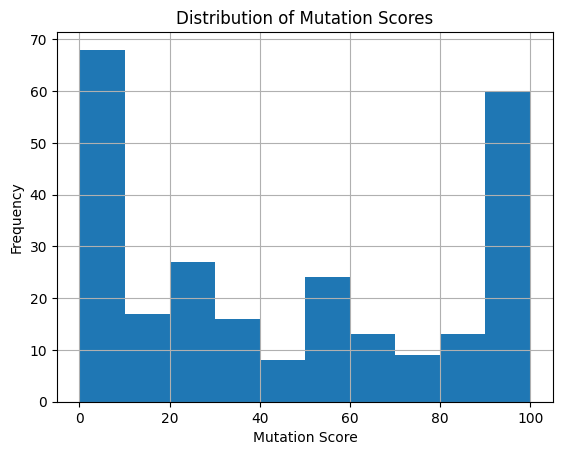

In [112]:
# Distribution of Mutation Scores
mutation_scores = df['mutation_score']
plt.hist(mutation_scores)
plt.xlabel('Mutation Score')
plt.ylabel('Frequency')
plt.title('Distribution of Mutation Scores')
plt.grid(True) 
plt.show()

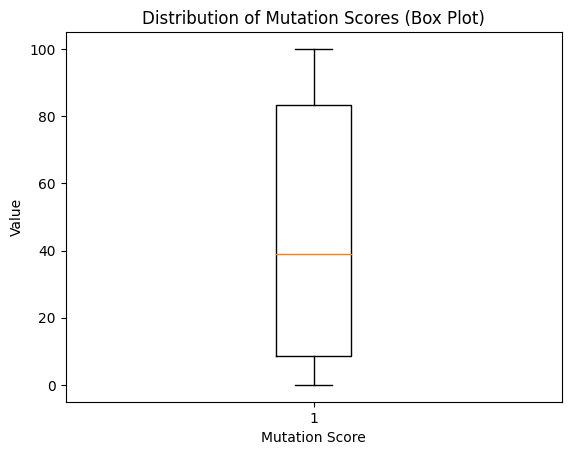

In [113]:
plt.boxplot(mutation_scores)
plt.xlabel('Mutation Score')
plt.ylabel('Value')
plt.title('Distribution of Mutation Scores (Box Plot)')
plt.show()

In [114]:
# catagorize mutation score 
average = 40

def map_to_category(score):
    """Maps a mutation score to a category (high, medium,low)"""
    if score < average:
        return "below average"

    else:
        return "above average"

In [115]:
df = df.assign(mutation_category = df['mutation_score'].apply(map_to_category))

**Current Dataset**

In [116]:
#Counts of mutation score categories
category_counts = df['mutation_category'].value_counts()
print(category_counts)

below average    128
above average    127
Name: mutation_category, dtype: int64


In [117]:
df.to_csv("database.csv", index=False)

#### Create a new DataFrame with the pattern list as column names

In [118]:
def create_pattern_df(df):
    df_new = pd.DataFrame(columns=config_patterns+['mutation_category']+['filename'])
    for i in range(len(df)):
        mutation = df['mutation_category'].iloc[i]
        filename = df['filename'].iloc[i]
        pattern_dict = df['pattern_existence'].iloc[i]
        # Extract pattern values 
        pattern_value_list = list(pattern_dict.values())
        #add the pattern_value_list to df_new
        df_new.loc[i] = pattern_value_list + [mutation] + [filename]
    return df_new

In [119]:
pattern_df = create_pattern_df(df.copy())  # Avoid modifying original DataFrame

In [120]:
pattern_df

,.//FunctionDef/body//If,.//FunctionDef/body//If[ancestor::If and not(parent::orelse)],".//FunctionDef[@name=""__init__""]/body/Return",".//FunctionDef//Compare/left[@id=""input_dirs""]/following-sibling::Compare/ops/NotEq | .//FunctionDef//Compare/comparators[@id=""input_dirs""]/following-sibling::Compare/ops/NotEq",.//FunctionDef//Try/ExceptHandler[not(ExceptHandler/type)],.//FunctionDef//Compare/ops/Is | .//FunctionDef//Compare/ops/Eq,.//FunctionDef[not(args/arg/annotation) or not(returns)],".//FunctionDef//Call/func/Attribute[@attr=""keys""]",.//FunctionDef/body/Assign/value/Dict/keys/Name[preceding-sibling::Name/@id = @id],.//FunctionDef[./body/Assert/test/Tuple],...,.//Call[count(./func/Attribute) > 3],.//FunctionDef[count(.//If | .//For | .//While | .//Try) > 3],.//FunctionDef[count(./body/*) > 100],.//ExceptHandler[not(./body/*)],.//Num,.//Global,.//ClassDef[count(./body/*) > 50],.//FunctionDef[count(./body/*) > 50],mutation_category,filename
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,below average,diagrams_output.json
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,below average,diagrams_output.json
2,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,below average,diagrams_output.json
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,below average,diagrams_output.json
4,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,above average,diagrams_output.json
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,above average,dummy_project.json
251,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,above average,dummy_project.json
252,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,above average,dummy_project.json
253,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,above average,dummy_project.json


In [121]:
pattern_df.to_csv("pattern_df.csv", index=False)

### Leave-One-Project-Out Cross-Validationn(LOPO CV)

Using K-Fold Cross Validation to iterate K times, randomly select one project to hid (validation set) then combine the remaining projects into a single training set

In [122]:
pattern_df

,.//FunctionDef/body//If,.//FunctionDef/body//If[ancestor::If and not(parent::orelse)],".//FunctionDef[@name=""__init__""]/body/Return",".//FunctionDef//Compare/left[@id=""input_dirs""]/following-sibling::Compare/ops/NotEq | .//FunctionDef//Compare/comparators[@id=""input_dirs""]/following-sibling::Compare/ops/NotEq",.//FunctionDef//Try/ExceptHandler[not(ExceptHandler/type)],.//FunctionDef//Compare/ops/Is | .//FunctionDef//Compare/ops/Eq,.//FunctionDef[not(args/arg/annotation) or not(returns)],".//FunctionDef//Call/func/Attribute[@attr=""keys""]",.//FunctionDef/body/Assign/value/Dict/keys/Name[preceding-sibling::Name/@id = @id],.//FunctionDef[./body/Assert/test/Tuple],...,.//Call[count(./func/Attribute) > 3],.//FunctionDef[count(.//If | .//For | .//While | .//Try) > 3],.//FunctionDef[count(./body/*) > 100],.//ExceptHandler[not(./body/*)],.//Num,.//Global,.//ClassDef[count(./body/*) > 50],.//FunctionDef[count(./body/*) > 50],mutation_category,filename
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,below average,diagrams_output.json
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,below average,diagrams_output.json
2,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,below average,diagrams_output.json
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,below average,diagrams_output.json
4,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,above average,diagrams_output.json
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,above average,dummy_project.json
251,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,above average,dummy_project.json
252,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,above average,dummy_project.json
253,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,above average,dummy_project.json


#### Training on different algorithms

* Random Forest Classifier 
* Gradient Boosting Classifiers
* Support Vector Machine (SVM)

In [125]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def evaluate_projects(pattern_df,algorithms):
    project_wise_f1 = {}
    project_wise_accuracy = {}
    for project_name in set(pattern_df['filename']):
        # Filter data for training (excluding current project)
        X_train = pattern_df[pattern_df['filename'] != project_name].drop(['filename','mutation_category'], axis=1)
        y_train = pattern_df[pattern_df['filename'] != project_name]['mutation_category']
    
        # Filter data for testing (current project)
        X_test = pattern_df[pattern_df['filename'] == project_name].drop(['filename','mutation_category'], axis=1)
        y_test = pattern_df[pattern_df['filename'] == project_name]['mutation_category']
        project_wise_f1[project_name] = {}
        project_wise_accuracy[project_name] = {}
        for name, model in algorithms.items():
            print()
            print(f"Project Targeted: {project_name}")
            print(f"Algorithm: {name}")
            
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            print("All actual vs. predicted categories:")
            
            for i in range(len(y_test)):
                print(f"Sample {i+1}: Actual - {y_test.iloc[i]}, Predicted - {y_pred[i]}")
            f1 = f1_score(y_test, y_pred, average='weighted')
            project_wise_f1[project_name][name] = f1
            accuracy = accuracy_score(y_test, y_pred)
            project_wise_accuracy[project_name][name] = accuracy
            
            # Predict training and test set labels
            y_pred_train = model.predict(X_train)
            y_pred_test = model.predict(X_test)
            
                
    print('-'* 100)
    return project_wise_f1, project_wise_accuracy
    

In [126]:
algorithms = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5),
    "Gradient Boosting": GradientBoostingClassifier(),
    "KNN": KNeighborsClassifier()
}
project_wise_f1, project_wise_accuracy = evaluate_projects(pattern_df.copy(), algorithms)


Project Targeted: code_output.json
Algorithm: Random Forest
All actual vs. predicted categories:
Sample 1: Actual - above average, Predicted - above average
Sample 2: Actual - above average, Predicted - above average
Sample 3: Actual - above average, Predicted - above average
Sample 4: Actual - above average, Predicted - above average
Sample 5: Actual - above average, Predicted - above average
Sample 6: Actual - above average, Predicted - below average
Sample 7: Actual - above average, Predicted - below average
Sample 8: Actual - above average, Predicted - below average
Sample 9: Actual - above average, Predicted - below average

Project Targeted: code_output.json
Algorithm: Gradient Boosting
All actual vs. predicted categories:
Sample 1: Actual - above average, Predicted - above average
Sample 2: Actual - above average, Predicted - above average
Sample 3: Actual - above average, Predicted - above average
Sample 4: Actual - above average, Predicted - above average
Sample 5: Actual - a

NameError: name 'accuracy_train' is not defined

In [164]:
sum_rf = 0
sum_gb = 0
sum_svc = 0
sum_knn = 0
count= 0
print("Project-wise F1-Scores:")
print("-" * 100)  # Adjust width for better alignment
print("{:<25} | {:>15} | {:>15} | {:>15}| {:<10}|".format("Project Name", "Random Forest", "Gradient Boosting", "Support Vector Machine", "KNN"))
print("-" * 100)
for project, scores in project_wise_f1.items():
  print("{:<25} | {:>15.4f} | {:>15.4f} | {:>15.4f}| {:>9.4f}|".format(project, scores.get("Random Forest", 0), scores.get("Gradient Boosting", 0), scores.get("Support Vector Machine", 0), round(scores.get("KNN", 0), 4)))  # Round KNN score to 4 decimal places
  count+= 1
  sum_rf += scores.get("Random Forest", 0)
  sum_gb += scores.get("Gradient Boosting", 0)
  sum_svc += scores.get("Support Vector Machine", 0)
  sum_knn += scores.get("KNN", 0)
print("-" * 100)
print("{:<25} | {:>15.4f} | {:>15.4f} | {:>15.4f}| {:>9.4f}|".format("Average F1-score", sum_rf/count, sum_gb/count,sum_svc/count, sum_knn/count))


Project-wise F1-Scores:
----------------------------------------------------------------------------------------------------
Project Name              |   Random Forest | Gradient Boosting | Support Vector Machine| KNN       |
----------------------------------------------------------------------------------------------------
101_sorting.json          |          0.0000 |          0.0000 |          0.0000|    0.0000|
lazytracker.json          |          0.4848 |          0.4848 |          0.0000|    0.5926|
101_intersection.json     |          0.4156 |          0.4156 |          0.4156|    0.4156|
101_palindrome.json       |          0.1667 |          0.2222 |          0.1667|    0.2222|
----------------------------------------------------------------------------------------------------
Average F1-score          |          0.2668 |          0.2807 |          0.1456|    0.3076|


In [165]:
sum_rf = 0
sum_gb = 0
sum_svc = 0
count= 0
# Print project-wise accuracy scores 
print("\nProject-wise Accuracy Scores:")
print("-" * 80)
print("{:<25} | {:>15} | {:>15} | {:>15}".format("Project Name", "Random Forest", "Gradient Boosting", "Support Vector Machine"))
print("-" * 80)
for project, scores in project_wise_accuracy.items():
    print("{:<25} | {:>15.4f} | {:>15.4f} | {:>15.4f}".format(project, scores["Random Forest"], scores["Gradient Boosting"], scores["Support Vector Machine"]))
    count+= 1
    sum_rf += scores.get("Random Forest", 0)
    sum_gb += scores.get("Gradient Boosting", 0)
    sum_svc += scores.get("Support Vector Machine", 0)
print("-" * 80)
print("{:<25} | {:>15.4f} | {:>15.4f} | {:>15.4f}".format("Average F1-score", sum_rf/count, sum_gb/count,sum_svc/count))



Project-wise Accuracy Scores:
--------------------------------------------------------------------------------
Project Name              |   Random Forest | Gradient Boosting | Support Vector Machine
--------------------------------------------------------------------------------
101_sorting.json          |          0.0000 |          0.0000 |          0.0000
lazytracker.json          |          0.3333 |          0.3333 |          0.0000
101_intersection.json     |          0.5714 |          0.5714 |          0.5714
101_palindrome.json       |          0.3333 |          0.3333 |          0.3333
--------------------------------------------------------------------------------
Average F1-score          |          0.3095 |          0.3095 |          0.2262


<function matplotlib.pyplot.xticks(ticks=None, labels=None, *, minor=False, **kwargs)>

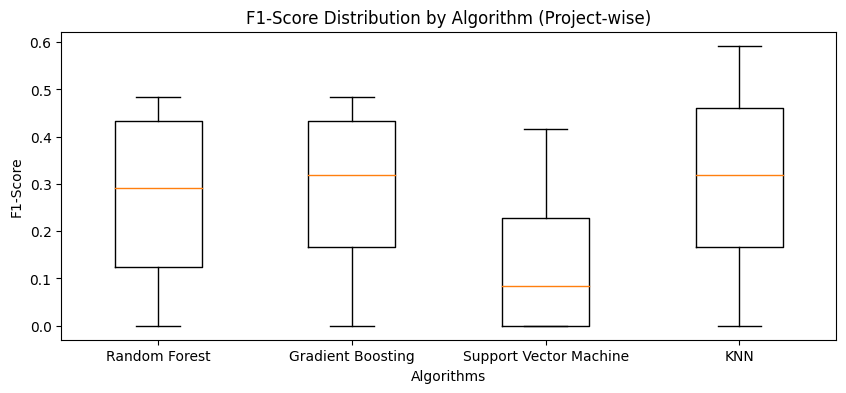

In [168]:
# Collect F1-scores for box plot
f1_scores_by_algorithm = {}
for algorithm, _ in algorithms.items():
  f1_scores_by_algorithm[algorithm] = []
  for project, scores in project_wise_f1.items():
    f1_scores_by_algorithm[algorithm].append(scores[algorithm])

# Create box plot
plt.figure(figsize=(10, 4))
plt.boxplot(f1_scores_by_algorithm.values(), labels=f1_scores_by_algorithm.keys())
plt.xlabel("Algorithms")
plt.ylabel("F1-Score")
plt.title("F1-Score Distribution by Algorithm (Project-wise)")
plt.xticks